In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
from IPython.display import display

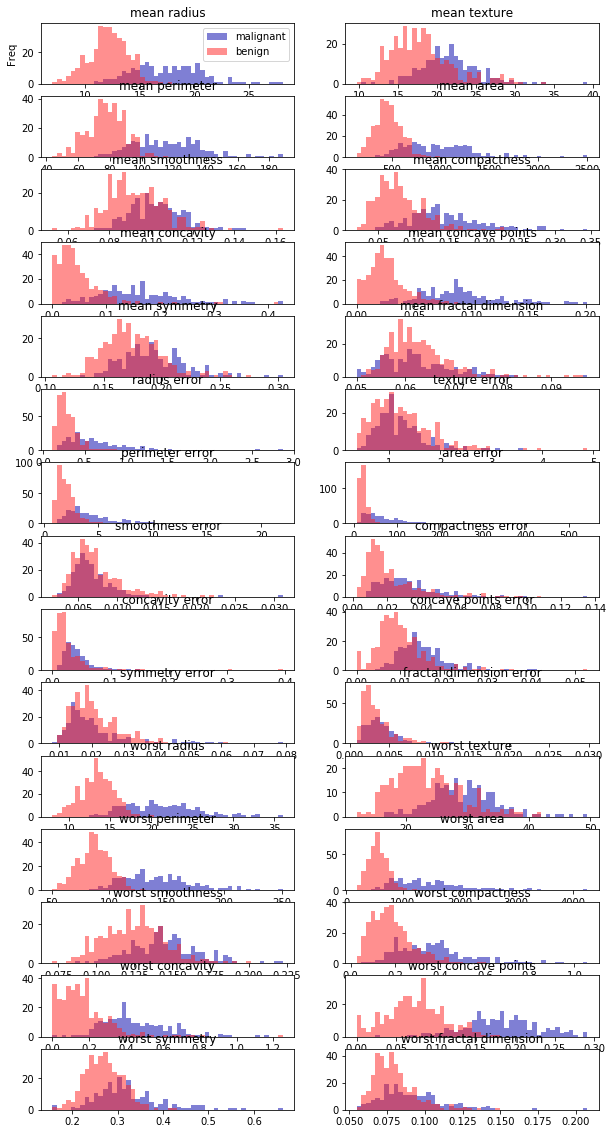

In [2]:
#dataset 1
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(1),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
ax[0].set_xlabel("Feature Magnitude")
ax[0].set_ylabel("Freq")
ax[0].legend(["malignant","benign"])
plt.show()

In [3]:
# Train and test split - randomizing and stratification
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0,stratify=cancer.target)

In [4]:
# we want to classify any new data into malignant or benign. Using Logistic, we can also use Kmeans, XGBoost, MLP etc
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression().fit(X_train,y_train)
#accuracy study
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))

0.962441314554
0.937062937063


In [5]:
print(logit.coef_)
print(logit.coef_.shape)
print(logit.coef_!=0) #all features are chosen

[[ 2.07134183  0.12418907  0.03028735 -0.01050155 -0.1241717  -0.42163938
  -0.62727377 -0.31442237 -0.17919983 -0.03180098 -0.08120993  0.59362768
   0.47072901 -0.10427976 -0.01340544 -0.0519836  -0.10080216 -0.04126288
  -0.03489436 -0.00508668  1.06380201 -0.31608187 -0.17542215 -0.0193388
  -0.22386511 -1.17862958 -1.50266726 -0.61329052 -0.49287299 -0.12686167]]
(1, 30)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True]]


In [6]:
#logit with l1 regularization, less features will be chosen
logitl1=LogisticRegression(C=100,penalty='l1').fit(X_train,y_train)
print(logitl1.score(X_train,y_train))
print(logitl1.score(X_test,y_test))
print(logitl1.coef_!=0)
print(logitl1.coef_)
print(sum(sum(logitl1.coef_ != 0))) #only 20 features are chosen

0.992957746479
0.937062937063
[[ True  True  True  True False  True  True  True False False  True  True
   True  True False False  True False False False  True  True  True  True
  False  True  True  True  True False]]
[[  1.40228476e+00  -1.70684238e-02   1.20740661e-01   7.65425620e-04
    0.00000000e+00   3.28707547e+01  -2.44191141e+01  -1.15253809e+02
    0.00000000e+00   0.00000000e+00  -7.82186080e+01  -5.39085969e-02
    5.08362889e+00   2.64221814e-01   0.00000000e+00   0.00000000e+00
    3.50301258e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.59342572e-01  -5.14001387e-01  -3.72091772e-01  -1.93514653e-02
    0.00000000e+00  -4.88115457e+00  -7.87141823e+00  -4.57008602e+01
   -5.25461319e+00   0.00000000e+00]]
20


In [7]:
#MLP
#X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0,stratify=cancer.target)
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='lbfgs',random_state=42).fit(X_train,y_train)
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.957746478873
0.937062937063


In [8]:
#KMeans
#take cancer data, do clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(cancer.data)
print(kmeans.labels_)
print(sum(cancer.target!=kmeans.labels_))
print(sum(cancer.target==kmeans.labels_))

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [9]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
print(ypred)
print(y_test)
print(sum(ypred!=y_test))
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, ypred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0]
[1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0]
5
Accuracy: 96.50%
